# LAB02 Assigment Template




### Exercise 0  Importing the census 

In [1]:
# Import libraries necessary for this project
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from time import time
from IPython.display import display  # Allows the use of display() for DataFrames


# Pretty display for notebooks
%matplotlib inline

data = pd.read_csv("census.csv")

data.head()


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Exercise 1  Exploration 

In [2]:
# The total number of records
n_records = data.count()
n_records

age                45222
workclass          45222
education_level    45222
education-num      45222
marital-status     45222
occupation         45222
relationship       45222
race               45222
sex                45222
capital-gain       45222
capital-loss       45222
hours-per-week     45222
native-country     45222
income             45222
dtype: int64

In [3]:
# The number of individuals making more than $50000 annually
data['income'] = data['income'].astype('string')
income_count = data['income'].value_counts()
n_greater_50k = income_count[1]
n_greater_50k

11208

In [4]:
# The number of individuals making at most $50000 annually
n_at_most_50k = income_count[0]
n_at_most_50k

34014

In [5]:
# The percentage of individuals making at more than $50000 annually
greater_percent = n_greater_50k / (n_greater_50k + n_at_most_50k)
print(greater_percent * 100, '%')

24.78439697492371 %


In [6]:
# Feature value for each column
for i in data.axes[1]:
    temp = pd.unique(data[i])
    print(i, '( length:', len(temp), ', type:', temp.dtype, '):\n', temp)

age ( length: 74 , type: int64 ):
 [39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86
 89 87]
workclass ( length: 7 , type: object ):
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
education_level ( length: 16 , type: object ):
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
education-num ( length: 16 , type: float64 ):
 [13.  9.  7. 14.  5. 10. 12.  4. 16. 11. 15.  3.  6.  1.  8.  2.]
marital-status ( length: 7 , type: object ):
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation ( length: 14 , type: object ):
 [' Adm-clerical' ' Exec-manage

### Exercise 2 Preprocessing 

<Figure size 432x288 with 0 Axes>

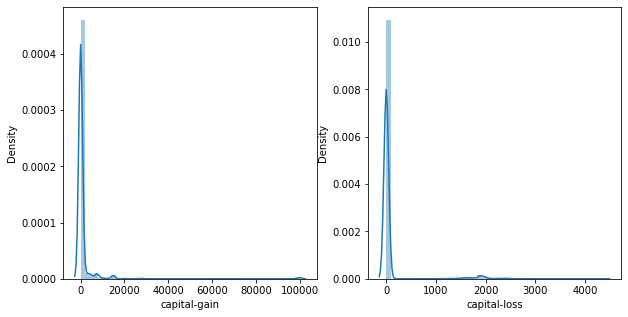

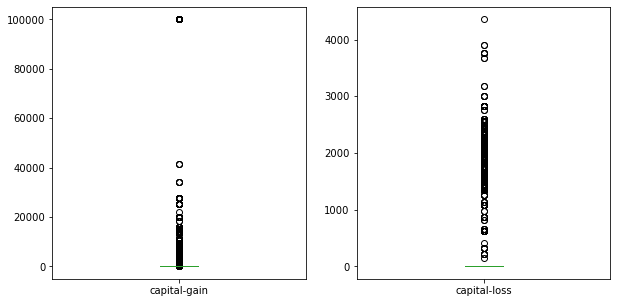

capital-gain skewness: 11.789002180291192
capital-loss skewness: 4.516304152981587


In [7]:
# Visualize skewed continuous features of original data
from matplotlib import pyplot as plt
import seaborn as sb

plt.figure(1)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sb.distplot(data['capital-gain'], ax=axes[0])
sb.distplot(data['capital-loss'], ax=axes[1])
plt.show()

plt.figure(2)
plt.subplot(121)
data['capital-gain'].plot.box(figsize=(10, 5))
plt.subplot(122)
data['capital-loss'].plot.box(figsize=(10, 5))

plt.show()

print("capital-gain skewness: {}".format(data['capital-gain'].skew()))
print("capital-loss skewness: {}".format(data['capital-loss'].skew()))

#### choosing outliers' treatment
<span style="color:#75c0e0">The logarithms performed better than the z-scores. Hence I choose to use logarithms.</span>

Z-score method:
capital-gain records outside Z-score |3|:  310
capital-loss records outside Z-score |3|:  2077
capital-gain within |3| / total =  44912 / 45222
capital-loss within |3| / total =  43145 / 45222


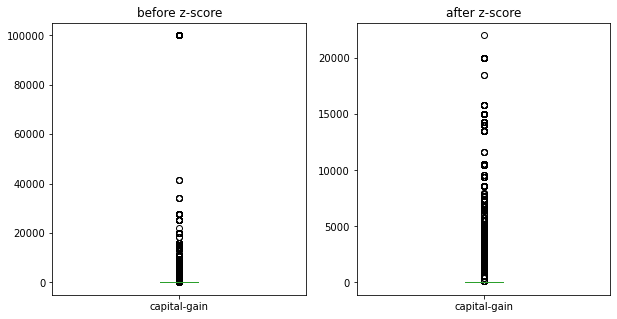

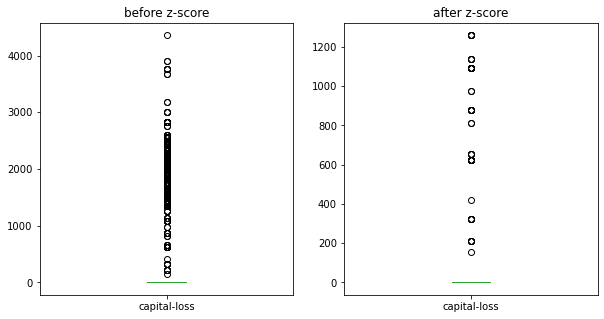

logarithms method:


<Figure size 432x288 with 0 Axes>

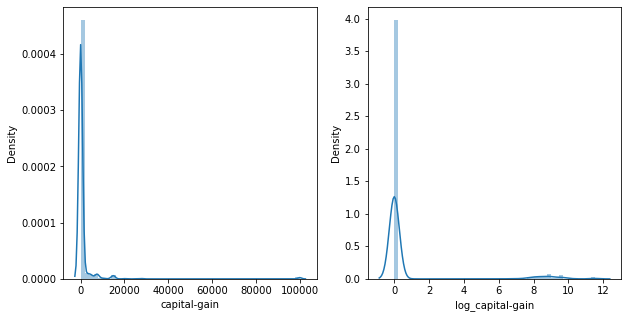

<Figure size 432x288 with 0 Axes>

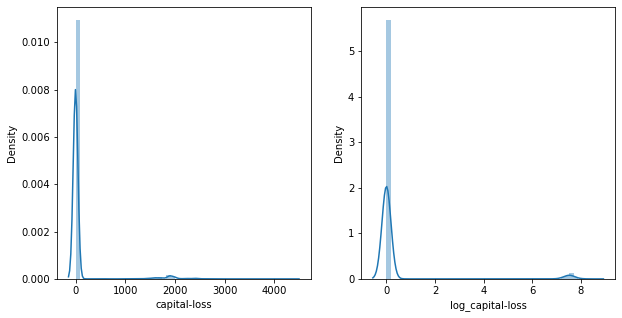

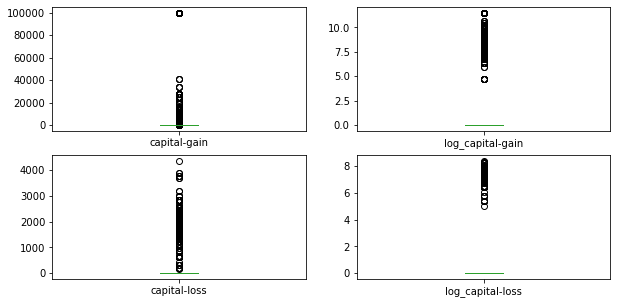

capital-gain skewness: 11.789002180291192
log_capital-gain skewness: 3.082385920215176
z-score capital-gain skewness: 5.03219708176093
capital-loss skewness: 4.516304152981587
log_capital-loss skewness: 4.271194769830899
z-score capital-gain skewness: 31.039687911139183


In [8]:
# Outliers Treatment

# 1. Z-score
from turtle import title
import scipy.stats as stats

print('Z-score method:')
data_gain = data.copy()
data_loss = data.copy()
data_gain['gainZR'] = stats.zscore(data_gain['capital-gain'])
data_loss['lossZR'] = stats.zscore(data_loss['capital-loss'])

print('capital-gain records outside Z-score |3|: ', data_gain[(data_gain['gainZR'] < -3) | (data_gain['gainZR'] > 3)].shape[0])
print('capital-loss records outside Z-score |3|: ', data_loss[(data_loss['lossZR'] < -3) | (data_loss['lossZR'] > 3)].shape[0])
data_gain = data_gain[(data_gain['gainZR'] > -3) & (data_gain['gainZR'] < 3)].reset_index()
data_loss = data_loss[(data_loss['lossZR'] > -3) & (data_loss['lossZR'] < 3)].reset_index()
print("capital-gain within |3| / total = ", data_gain.shape[0], "/", data.shape[0])
print("capital-loss within |3| / total = ", data_loss.shape[0], "/", data.shape[0])

plt.figure(1)
plt.subplot(121)
data['capital-gain'].plot.box(figsize=(10, 5), title='before z-score')
plt.subplot(122)
data_gain['capital-gain'].plot.box(figsize=(10, 5), title='after z-score')

plt.figure(2)
plt.subplot(121)
data['capital-loss'].plot.box(figsize=(10, 5), title='before z-score')
plt.subplot(122)
data_loss['capital-loss'].plot.box(figsize=(10, 5), title='after z-score')

plt.show()

# 2. Log
print('logarithms method:')
data['log_capital-gain'] = np.log(data['capital-gain'] + 1)
data['log_capital-loss'] = np.log(data['capital-loss'] + 1)

plt.figure(1)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sb.distplot(data['capital-gain'], ax=axes[0])
sb.distplot(data['log_capital-gain'], ax=axes[1])
plt.show()

plt.figure(2)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sb.distplot(data['capital-loss'], ax=axes[0])
sb.distplot(data['log_capital-loss'], ax=axes[1])
plt.show()

plt.figure(3)
plt.subplot(221)
data['capital-gain'].plot.box(figsize=(10, 5))
plt.subplot(222)
data['log_capital-gain'].plot.box(figsize=(10, 5))
plt.subplot(223)
data['capital-loss'].plot.box(figsize=(10, 5))
plt.subplot(224)
data['log_capital-loss'].plot.box(figsize=(10, 5))
plt.show()

print("capital-gain skewness: {}".format(data['capital-gain'].skew()))
print("log_capital-gain skewness: {}".format(data['log_capital-gain'].skew()))
print('z-score capital-gain skewness: {}'.format(data_gain['capital-gain'].skew()))
print("capital-loss skewness: {}".format(data['capital-loss'].skew()))
print("log_capital-loss skewness: {}".format(data['log_capital-loss'].skew()))
print('z-score capital-gain skewness: {}'.format(data_loss['capital-loss'].skew()))


In [9]:
#  Data Transformation
from sklearn.preprocessing import MinMaxScaler
model = MinMaxScaler()
data2 = data.copy()
Min_Max_numeral = ['Min_Max_age', 'Min_Max_edu', 'Min_Max_hour', 'Min_Max_log_gain', 'Min_Max_log_loss']
numeral = ['age', 'education-num', 'hours-per-week', 'log_capital-gain', 'log_capital-loss']
data2[Min_Max_numeral] = model.fit_transform(data2[numeral])

# Perform one-hot encoding on the data
nonnumeral = ['workclass', 'education_level', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
data_labels = data2.copy()
data_labels.drop(numeral, axis=1, inplace=True)
data_labels.drop(['capital-gain', 'capital-loss'], axis=1, inplace=True)
data_labels = pd.get_dummies(data_labels, columns=nonnumeral, drop_first=True)
data_labels.head()

,Min_Max_age,Min_Max_edu,Min_Max_hour,Min_Max_log_gain,Min_Max_log_loss,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_>50K
0,0.301370,0.800000,0.397959,0.667492,0.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0.452055,0.800000,0.122449,0.000000,0.0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0.287671,0.533333,0.397959,0.000000,0.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.493151,0.400000,0.397959,0.000000,0.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.150685,0.800000,0.397959,0.000000,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Exercise 3 Shuffle and Split Data

In [10]:
# Split the 'feature' and 'income' data into training and testing sets
from sklearn.model_selection import train_test_split
Y = data_labels['income_>50K']
X = data_labels.drop('income_>50K', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=0)

print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)

print('')
print("The shape of y_train is:", Y_train.shape)
print("The shape of y_test is:", Y_test.shape)

The shape of X_train is: (36177, 95)
The shape of X_test is: (9045, 95)

The shape of y_train is: (36177,)
The shape of y_test is: (9045,)


### Exercise 4 Evaluating Model
The following are some of the supervised learning models that are currently available in `scikit-learn`:
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, RandomForest)
- K-Nearest Neighbors
- Support Vector Machines (SVM)
- Logistic Regression

You need choose three of them, draw three ROC curves on the census data, and analyze and compare the them.

In [11]:
# Evaluating Model
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

threshold = 0.8

In [12]:
# Gaussian Naive Bayes
GNB_model = GaussianNB()
GNB_model.fit(X_train, Y_train)

GaussianNB()

In [13]:
# Decision Tree
DT_model = DecisionTreeClassifier(random_state=0)
DT_model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [14]:
# Ada-Boost
ADA_model = AdaBoostClassifier()
ADA_model.fit(X_train, Y_train)

AdaBoostClassifier()

In [15]:
# K-Neighbors
k_error = 999
KNN_k = 1
for k in range(1, 32):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_test, Y_test, cv=6, scoring='accuracy')
    if 1 - scores.mean() < k_error:
        KNN_k = k
        k_error = 1 - scores.mean()
KNN_model = KNeighborsClassifier(n_neighbors=KNN_k)
KNN_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=13)

In [16]:
# Support Vector
SVC_model = SVC(C=10)
SVC_model.fit(X_train, Y_train)

SVC(C=10)

In [17]:
# Logistic Regression
LR_model = LogisticRegression(random_state=0)
LR_model.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [18]:
# Predicts. Analysis and comparisons are under Exercise 5
Y_GNB = GNB_model.predict(X_test)
Y_DT = DT_model.predict(X_test)
Y_ADA = ADA_model.predict(X_test)
Y_KNN = KNN_model.predict(X_test)
Y_SVC = SVC_model.predict(X_test)
Y_LR = LR_model.predict(X_test)

### Exercise 4 Questions
What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000

In [19]:
#What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000
from sklearn.metrics import accuracy_score, f1_score

all_50k = np.ones(9045, dtype=int)
print('accuracy:', accuracy_score(Y_test, all_50k))
print('F1-score:', f1_score(Y_test, all_50k))

accuracy: 0.24378109452736318
F1-score: 0.392


### Exercise 5 Evaluating Model
<span style="color:#75c0e0">I implemented 6 different classifiers of Gaussian Naive Bayes, Decision Tree, ADA-Boost, K-Nearest-Neighbour, and Support Vector.</span>

<span style="color:#75c0e0">The ADA-Boost Classifier performed the best among them, followed by the SVM and the Logistic Regression models. Their scores are shown below.</span>

<span style="color:#75c0e0">The reason why ADA-Boost stands out could be that the binary classification problem is just right for the model, which is precise for that it iterates many times. And after the normalization the abnormal records in the dataset merely disturb the model, avoiding its weakness. It can be expected that with a more careful data preprocessing the outcome will be even better.</span>

<span style="color:#75c0e0">The Gaussian Naive Bayes is the weakest. This is quite reasonable since that many columns in the data are obviously not independent, which contradicts with the naivety of the model.</span>

<span style="color:#75c0e0">Other models are just doing well and do not fall back so much after the ADA-Boost. Unlike the Gaussian Naive Bayes, they do not show any incompatibility with regard to the dataset.</span>

Gaussian Naive Bayes:
accuracy: 0.5799889441680487
F1-score: 0.5200252684775742


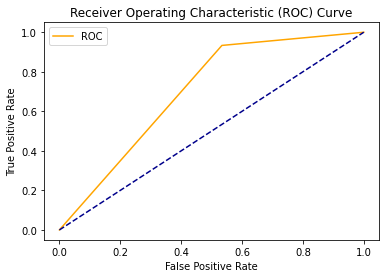


Decision Tree Classifier:
accuracy: 0.8176893311221669
F1-score: 0.6215285747073674


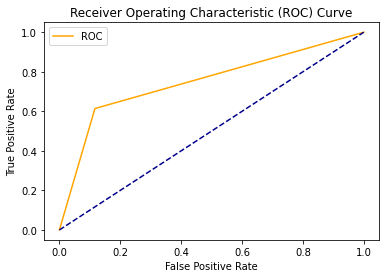


ADA-Boost Classifier:
accuracy: 0.8562741846323936
F1-score: 0.6713852376137512


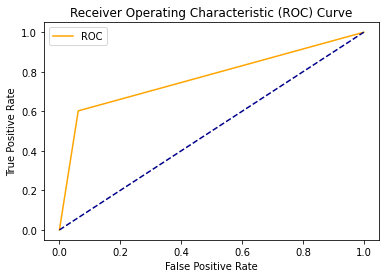


K Nearest Neighbour Classifier:
accuracy: 0.8337202874516307
F1-score: 0.6326331216414265


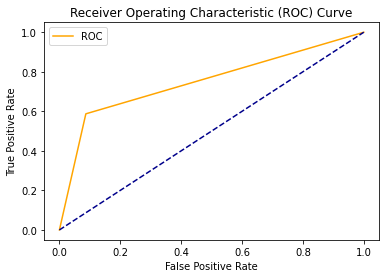


Support Vector Classifier:
accuracy: 0.8437810945273632
F1-score: 0.6535915665604314


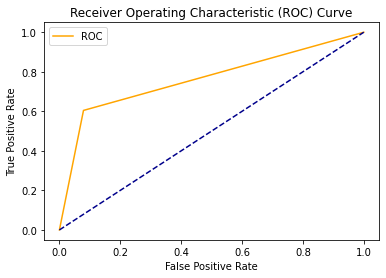


Logistic Regression:
accuracy: 0.8417910447761194
F1-score: 0.6472763125462164


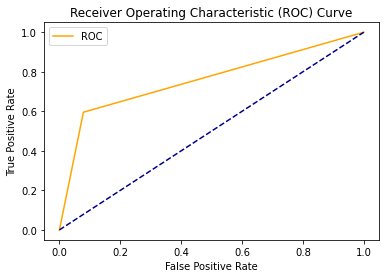

In [20]:
from sklearn.metrics import roc_curve

def plot_ROC (y_pred):
    fper, tper, thresholds = roc_curve(Y_test, y_pred)
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

print('Gaussian Naive Bayes:')
print('accuracy:', accuracy_score(Y_test, Y_GNB))
print('F1-score:', f1_score(Y_test, Y_GNB))
plt.figure(1)
plot_ROC(Y_GNB)

print('\nDecision Tree Classifier:')
print('accuracy:', accuracy_score(Y_test, Y_DT))
print('F1-score:', f1_score(Y_test, Y_DT))
plt.figure(2)
plot_ROC(Y_DT)

print('\nADA-Boost Classifier:')
print('accuracy:', accuracy_score(Y_test, Y_ADA))
print('F1-score:', f1_score(Y_test, Y_ADA))
plt.figure(3)
plot_ROC(Y_ADA)

print('\nK Nearest Neighbour Classifier:')
print('accuracy:', accuracy_score(Y_test, Y_KNN))
print('F1-score:', f1_score(Y_test, Y_KNN))
plt.figure(4)
plot_ROC(Y_KNN)

print('\nSupport Vector Classifier:')
print('accuracy:', accuracy_score(Y_test, Y_SVC))
print('F1-score:', f1_score(Y_test, Y_SVC))
plt.figure(5)
plot_ROC(Y_SVC)

print('\nLogistic Regression:')
print('accuracy:', accuracy_score(Y_test, Y_LR))
print('F1-score:', f1_score(Y_test, Y_LR))
plt.figure(5)
plot_ROC(Y_LR)


## Question:
### Q1:
#### An important task when performing supervised learning on a dataset like the census data we study here is determining which features provides the most predictive power. Choose a scikit-learn classifier (e.g adaboost, random forests) that has a feature_importance_ attribute, which is a function that ranks the importance of features according to the chosen classifier. List two supervised learning models that apply to this problem, and you will test them on census data and plot the following graph.

ADA-Boost:


<Figure size 432x288 with 0 Axes>

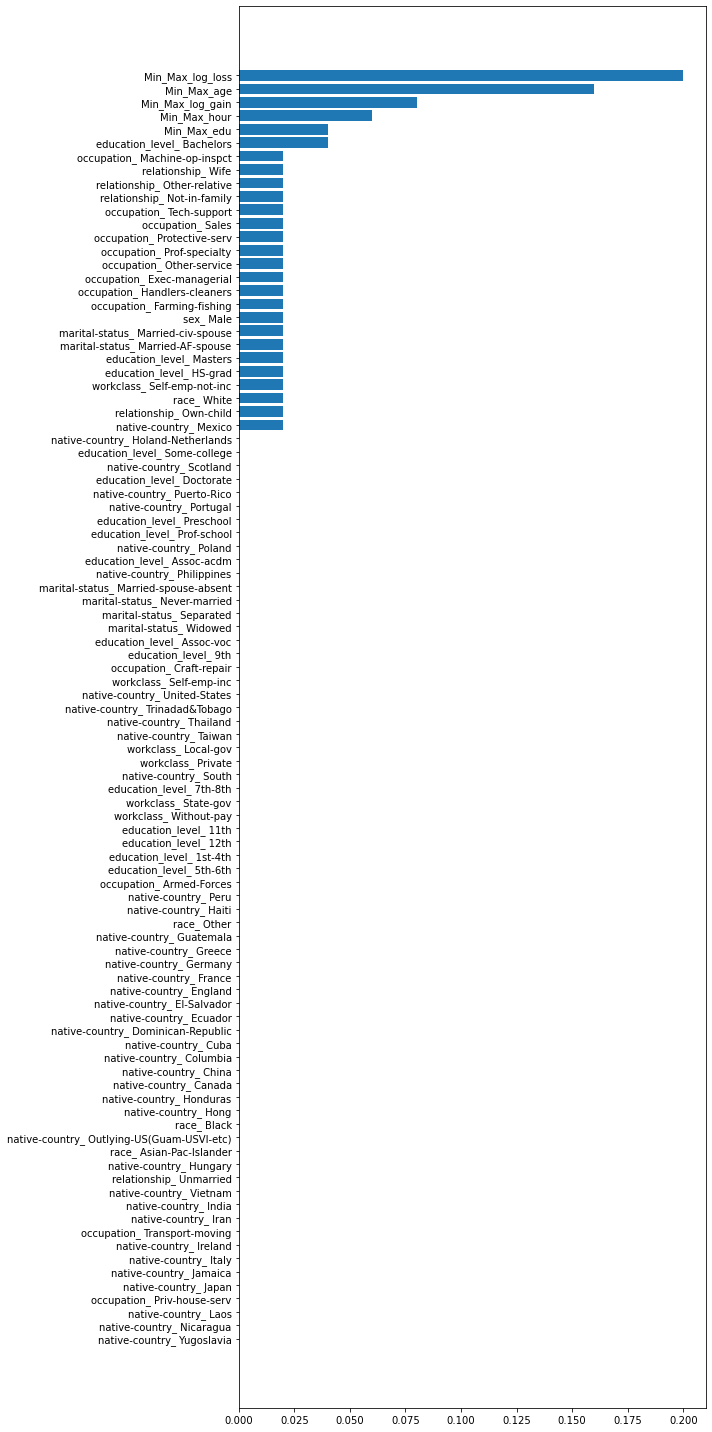

Decision Tree:


<Figure size 432x288 with 0 Axes>

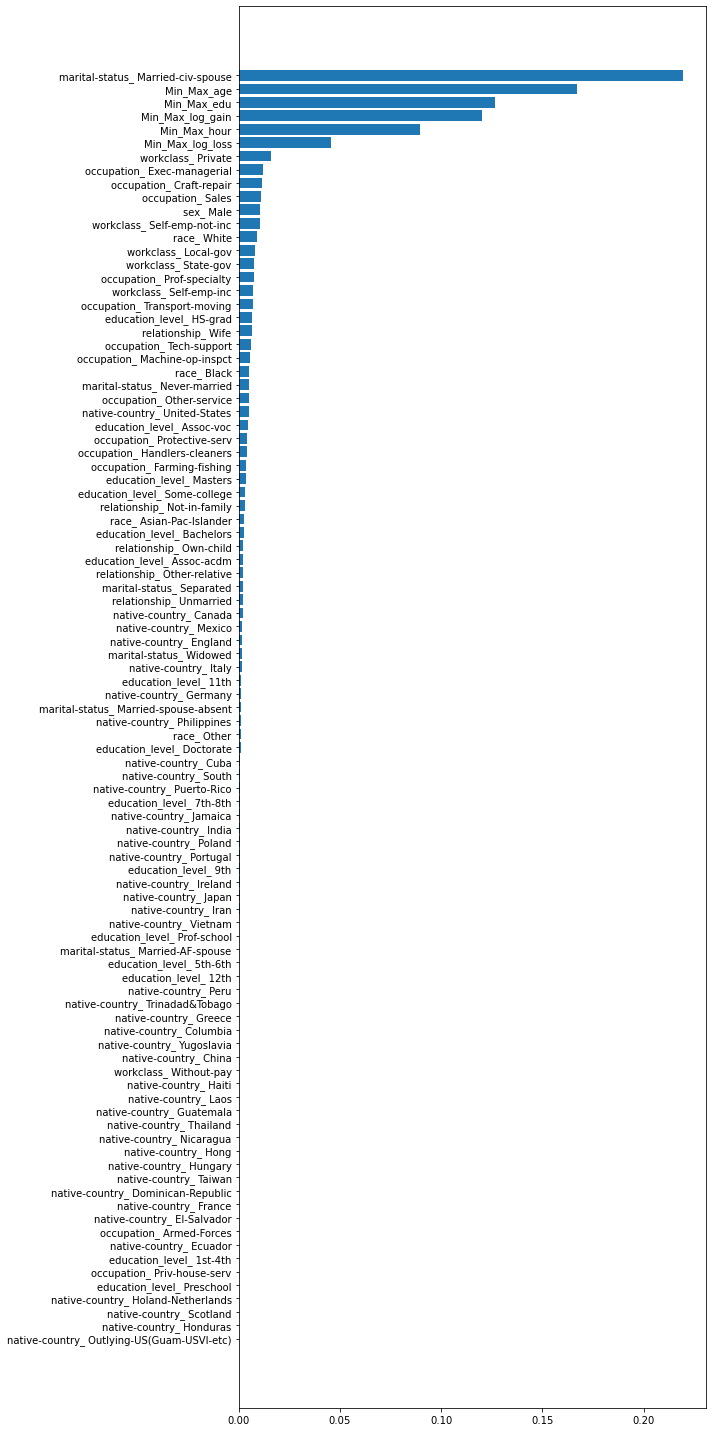

In [21]:
feature_names = X.axes[1]

order = pd.DataFrame({'names': feature_names, 'values': ADA_model.feature_importances_})
order.sort_values(by='values', inplace=True)

print('ADA-Boost:')
plt.figure(1)
fig, ax = plt.subplots(figsize=(10, 20))
b = ax.barh(range(len(feature_names)), order['values'])
ax.set_yticks(range(len(order['names'])))
ax.set_yticklabels(order['names'])
plt.tight_layout()
plt.show()

order = pd.DataFrame({'names': feature_names, 'values': DT_model.feature_importances_})
order.sort_values(by='values', inplace=True)

print('Decision Tree:')
plt.figure(2)
fig, ax = plt.subplots(figsize=(10, 20))
b = ax.barh(range(len(feature_names)), order['values'])
ax.set_yticks(range(len(order['names'])))
ax.set_yticklabels(order['names'])
plt.tight_layout()
plt.show()

### Q2:
#### Describe one real-world application in industry where a model can be applied

<span style="color:#75c0e0">Using Decision-Tree-based ADA-Boost model to predict the chance that Shenzhen rains given some meteorologic statistics.</span>

### Q3:
#### What are the strengths of the model; when does it perform well?
<span style="color:#75c0e0">1. It can be based on simple linear models and is thus easy to understand. The programmer can figure out which weak learner is responsible for the unideal result.</span>

<span style="color:#75c0e0">2. Wide range of the weak learners are available, making ADA-Boost flexible.</span>

<span style="color:#75c0e0">3. As a classifier, it is proved by time that it has a high precison. My work above confirms this also.</span>

<span style="color:#75c0e0">It performs well when the model is not sensitive to the time consumption, and the dataset is of high quality. Most of times, it does well.</span>

### Q4:
#### What are the weaknesses of the model; when does it perform poorly?
<span style="color:#75c0e0">1. Its performance relies on the setting of the number of weak learner. The choosing of the number is a problem.</span>

<span style="color:#75c0e0">2. It is sensitive to unjust data. Hence when the dataset is unbalanced, the precision decrease fast.</span>

<span style="color:#75c0e0">3. ADA-Boost is relatively time consuming.</span>

<span style="color:#75c0e0">It performs poorly when the dataset is unbalanced, or when the parameters are not properly set. It is also not suitable for time-sensitive circumstances.</span>

### Q5:
#### What makes this model a good candidate for the problem, given what you know about the data?
<span style="color:#75c0e0">1. The prediction target is a dual problem, which suits this model well.</span>

<span style="color:#75c0e0">2. As a public service, the whether forecast should be explainable to the public. ADA-Boost, based on simple linear learners, with the ability to sort the importance of different factors, is relatively understandable as for the reason for the prediction result. Hence generating convincing whether report is possible with this model.</span>

<span style="color:#75c0e0">3. The whether services are rich in computing power and there is enough time lag between the data and the forecasts. Hence ADA-Boost is affordable.</span>

<span style="color:#75c0e0">4. Modern whether sensors are precise. Data collected are good enough for the model to perform well and get away from the effect of unjust records.</span>

<span style="color:#75c0e0">5. The whether causalities seldom change. Hence once the parameters are settled after tests, the model will keep a good performance for a long time, making the weakness of its choosing the parameters ignorable.</span>